In [6]:
import matplotlib.image as mpimg
import numpy as np
from utils import *

In [7]:
img = mpimg.imread('lulus.jpg')  
img = np.rot90(img)

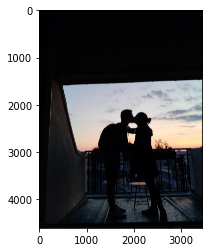

In [8]:
plt.imshow(img)
plt.show()

In [9]:
gray = rgb2gray(img)

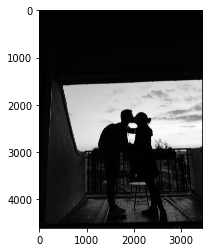

In [10]:
plot_gray(gray)

In [17]:
center = [2300,2000]
radius = 600

In [18]:
gray_crop = crop_image_circle(gray,center,radius)

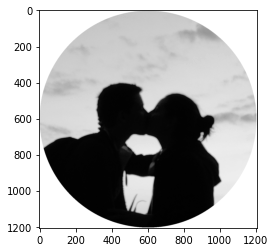

In [19]:
plot_gray(gray_crop)

In [ ]:
nail_positions = generate_nail_positions(radius, 10, gray_crop.shape,True)
nail_positions

In [ ]:
line=[[200,100],[500,400]]
plot_gray(generate_line_matrix(line,gray_crop.shape))

In [ ]:
tmp = generate_line_matrix(line,gray_crop.shape)
plot_gray(add_line(4,8, nail_positions, tmp))

In [22]:
number = 300
threshold = 1
res = 255*np.ones(shape=(gray_crop.shape))
nail_center = False
thread_thickness = 0.9
nail_positions = generate_nail_positions(radius, number, gray_crop.shape,nail_center)
current_idx = 0

In [32]:
for n in range(1000):
    if n%10==0:
        print(n,end='')
    m = math.inf
    possible_next_ways = possible_next_nails(current_idx, len(nail_positions),threshold,nail_center)
    for i in possible_next_ways:   
        #print(i)
        tmp_res = add_line(current_idx,i,nail_positions,res,thread_thickness)       
        tmp_m = distance_image(tmp_res,gray_crop)
        if tmp_m < m:
            m = tmp_m
            min_res = tmp_res
            next_position = i
    if current_idx == next_position:
        print('break')
        break
    res = min_res
    current_idx = next_position
    if n%10==0:
            print("  distance: "+str(m))
plot_gray(res)

0  distance: 108638.28187642421
10  distance: 108542.2456633612
20  distance: 108446.41865714676
30  distance: 108351.24545455085
40  distance: 108256.16478512515
50  distance: 108161.18622681718
60  distance: 108066.71670357481
70  distance: 107972.52990261209
80  distance: 107878.80174093538
90  distance: 107784.75247043761
100  distance: 107690.73308004998
110  distance: 107596.35235176064
120  distance: 107502.10070709701
130  distance: 107384.98760293266
140  distance: 107292.21195720803
150  distance: 107198.97075932239
160  distance: 107106.35626006371
170  distance: 107013.786288294
180  distance: 106921.35010871459
190  distance: 106829.00519357754
200  distance: 106737.07681663186
210  distance: 106645.45028333904
220  distance: 106554.19199576297
230  distance: 106462.63448083041
240  distance: 106352.18232805897
250  distance: 106257.23621764743
260  distance: 106166.426970515
270  distance: 106076.15946527866
280  distance: 105985.49335939767


KeyboardInterrupt: 

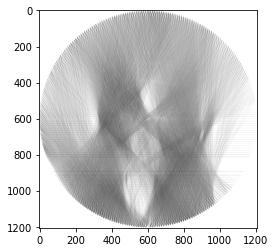

In [33]:
plot_gray(res)

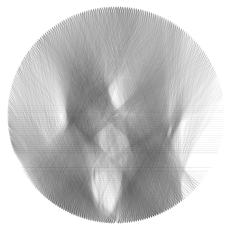

In [37]:
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.savefig('lulusTOP3.png')
plt.show()